回归方法数学模型:y=1.671x+-6.047
learning_rate:1	iter_num:1000
训练模型准确率:0.9625
测试模型准确率:0.85

K近邻法
K值选取为5
判断准确率为0.9625

请输入要判断的点：（提示：5.3 1.8）5.3 1.8


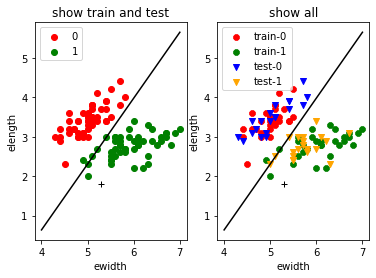

回归判断该点类别为0
K近邻法判断该点类别为0


In [9]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# 数据获取
def get_data():
    iris = load_iris()
    data = iris.data
    result = iris.target
    return data, result

# 将数据处理为训练集和测试集
def data_deal(data, result):
    data_list = []
    for i in data:
        tem_list = [i[0], i[1]]
        data_list.append(tem_list)
    res_list = []
    for j in result:
        res_list.append(j)
    train_list = data_list[0: 10] + data_list[20: 80] + data_list[90: 100]
    train_result = res_list[0: 10] + res_list[20: 80] + res_list[90: 100]
    test_list = data_list[0: 40] + data_list[60: 100]
    test_result = res_list[0: 40] + res_list[60: 100]

    return data_list, train_list, test_list, train_result, test_result

# 回归方法训练
def train(learning_rate, iter_num, train_data, result):
    x_c = 0
    y_c = 0
    for i in train_data:
        x_c = x_c + i[0]
        y_c = y_c + i[1]
    m = x_c/len(train_data)
    n = y_c/len(train_data)
    w = 0
    b = 0
    ok_rate = 0
    for i in range(iter_num):
        train_r = []
        b = n-w*m
        count = 0
        for j in train_data:
            if j[1] > w*j[0]+b:
                train_r.append(0)
            else:
                train_r.append(1)
        for ii in range(len(result)):
            if result[ii] == train_r[ii]:
                count = count+1
        train_ok_rate = count/len(train_data)
        if ok_rate <= train_ok_rate:
            w = w + learning_rate
        else:
            w = w - learning_rate
        learning_rate = learning_rate*0.9
        ok_rate = train_ok_rate

    return ok_rate, w, b


# 回归方法测试
def test(w, b, test_list, test_result):
    test_res = []
    count = 0
    for j in test_list:
        if j[1] > w * j[0] + b:
            test_res.append(0)
        else:
            test_res.append(1)
    for i in range(len(test_result)):
        if result[i] == test_res[i]:
            count = count + 1
    oks = count/len(test_result)
    return oks


# 绘制函数图像和输入点
def fun_image(w, b, dot):
    iris = load_iris()
    irisFeature = iris.data
    irisTarget = iris.target

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    plt.sca(ax1)
    for i in range(0, 100):
        if irisTarget[i] == 0:
            type11 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="r")
        elif irisTarget[i] == 1:
            type22 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="g")

    plt.title("show train and test")
    plt.xlabel("ewidth")
    plt.ylabel("elength")
    x = np.linspace(4, 7, 256)
    plt.plot(x, w * x + b, color='black')
    plt.legend((type11, type22), ('0', '1'))
    plt.plot(dot[0], dot[1], color='black', marker='+')

    plt.sca(ax2)
    for i in range(20, 80):
        if irisTarget[i] == 0:
            type1 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="r", marker="8")
        elif irisTarget[i] == 1:
            type2 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="g", marker="8")
    for i in range(0, 20):
        if irisTarget[i] == 0:
            type3 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="blue", marker="v")
        elif irisTarget[i] == 1:
            plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="orange", marker="v")
    for i in range(80, 100):
        if irisTarget[i] == 0:
            plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="blue", marker="v")
        elif irisTarget[i] == 1:
            type4 = plt.scatter(irisFeature[i, 0], irisFeature[i, 1], c="orange", marker="v")


    plt.title("show all")
    plt.xlabel("ewidth")
    plt.ylabel("elength")
    x = np.linspace(4, 7, 256)
    plt.plot(x, w*x+b, color='black')
    plt.plot(dot[0], dot[1], color='black', marker='+')

    plt.legend((type1, type2, type3, type4), ('train-0', 'train-1', 'test-0', 'test-1'))
    plt.show()

# 回归方法判断点的类型
def check_point(w, b, dot):
    y = w*dot[0] + b
    if y > dot[1]:
        return "回归判断该点类别为0"
    else:
        return "回归判断该点类别为1"


# k近邻法计算距离方法
def distance(A, B):
    return (abs((B[0]-A[0])**2+(B[1]-A[1])**2))**0.5


# k近邻法训练，测试准确率
def K_train(train_list, train_result, k):
    dis_list = []
    # 所有点到别的点的距离
    for i in train_list:
        dis = []
        for j in train_list:
            dis.append(distance(i, j))
        dis_list.append(dis)

    # 获取到训练集中每个点的最近5个点的索引
    min_dis_list = []
    for m in range(len(dis_list)):
        temp = []
        for n in range(int(k+1)):
            temp.append(dis_list[m].index(min(dis_list[m])))
            dis_list[m][dis_list[m].index(min(dis_list[m]))] = 100
            temp.sort()
        x = temp[1:]
        min_dis_list.append(x)

    # 根据索引判断对应点的类别
    dot_type = []
    for ii in min_dis_list:
        mm = 0
        nn = 0
        for jj in ii:
            if jj <= 50:
                mm = mm+1
            else:
                nn = nn+1
        if mm >= nn:
            dot_type.append(0)
        else:
            dot_type.append(1)

    # 计算准确率
    count = 0
    for xx in range(len(dot_type)):
        if dot_type[xx] == train_result[xx]:
            count = count+1

    return count/len(dot_type)


# k近邻法判断点的类型
def K_check_point(dots, check_list, result):
    dis = []
    for i in check_list:
        dis.append(distance(dots, i))
    min_dis = []
    for j in range(5):
        min_dis.append(dis.index(min(dis)))
        dis[dis.index(min(dis))] = 100
    zero = 0
    one = 0
    for s in min_dis:
        if result[s] == 0:
            zero = zero+1
        else:
            one = one+1
    if one > zero:
        return "K近邻法判断该点类别为0"
    else:
        return "K近邻法判断该点类别为1"



if __name__ == '__main__':
    data, result = get_data()
    data_list, train_list, test_list, train_result, test_result = data_deal(data, result)
    learning_rate = 1
    iter_num = 1000
    ok_rate, w, b = train(learning_rate, iter_num, train_list, train_result)
    test_ok_rate = test(w, b, test_list, test_result)
    k = 5
    K_ok_rate = K_train(train_list, train_result, k)
  
    print("回归方法"
          "数学模型:y={}x+{}\n"
          "learning_rate:{}\titer_num:{}\n"
          "训练模型准确率:{}\n"
          "测试模型准确率:{}\n".format(round(w, 3), round(b, 3), learning_rate, iter_num, ok_rate, test_ok_rate))
    print("K近邻法\n"
          "K值选取为{}\n"
          "判断准确率为{}\n".format(k, K_ok_rate))

    dots = list(map(float, input("请输入要判断的点：（提示：5.3 1.8）").split()))
    fun_image(w, b, dots)
    print(check_point(w, b, dots))
    print(K_check_point(dots, train_list, train_result))

